# Possum Regression

# Импорт библиотекa

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
le = LabelEncoder()



In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('possum.csv')

In [7]:
df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


### Признаки:
- case - Номер случа
- site - номер места поимки существа
- Pop - место популяции существая
- sex - Пол
- age - Возр (целевая переменная)аст
- hdlngth - Длина головы
- skullw - Ширина черепа
- totlngth - Общая длина
- tail - Длина хвоста
- footlgth - Длина стопы
- earconch - Размер ушной раковины
- eye - Размер глаза
- chest - Ширина груди
- belly - Ширина живота

In [9]:
# просматриваем размерность таблицы
df.shape

(104, 14)

In [10]:
df['Pop'].value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


age и footlngth содержат незаполненные ячейки.

In [13]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке case = 0
Кол-во пропусков в колонке site = 0
Кол-во пропусков в колонке Pop = 0
Кол-во пропусков в колонке sex = 0
Кол-во пропусков в колонке age = 2
Кол-во пропусков в колонке hdlngth = 0
Кол-во пропусков в колонке skullw = 0
Кол-во пропусков в колонке totlngth = 0
Кол-во пропусков в колонке taill = 0
Кол-во пропусков в колонке footlgth = 1
Кол-во пропусков в колонке earconch = 0
Кол-во пропусков в колонке eye = 0
Кол-во пропусков в колонке chest = 0
Кол-во пропусков в колонке belly = 0


Обнаружили пропуски в колонке

In [15]:
df.duplicated().sum()

0

In [16]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

age         2
footlgth    1
dtype: int64

## Просматриваем отсутствущие значения

In [18]:
print(df[df["age"].isnull()][null_columns])

    age  footlgth
43  NaN      70.3
45  NaN      72.8


In [19]:
print(df[df["footlgth"].isnull()][null_columns])

    age  footlgth
40  5.0       NaN


In [20]:
# просматриваем количество в колонке age
df['age'].value_counts()

age
3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64

In [21]:
# просматриваем количество в колонке footlgth
df['footlgth'].value_counts()

footlgth
73.2    4
65.6    3
72.8    3
62.8    2
63.1    2
       ..
72.0    1
69.0    1
64.0    1
67.9    1
62.9    1
Name: count, Length: 75, dtype: int64

## Добавление в нулевые значение 

In [23]:
foots = [67.4]
m = df['footlgth'].isna()
df.loc[m, 'footlgth'] = foots

In [24]:
ages = [4.0, 7.0]
n = df['age'].isna()
df.loc[n, 'age'] = ages

In [25]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке case = 0
Кол-во пропусков в колонке site = 0
Кол-во пропусков в колонке Pop = 0
Кол-во пропусков в колонке sex = 0
Кол-во пропусков в колонке age = 0
Кол-во пропусков в колонке hdlngth = 0
Кол-во пропусков в колонке skullw = 0
Кол-во пропусков в колонке totlngth = 0
Кол-во пропусков в колонке taill = 0
Кол-во пропусков в колонке footlgth = 0
Кол-во пропусков в колонке earconch = 0
Кол-во пропусков в колонке eye = 0
Кол-во пропусков в колонке chest = 0
Кол-во пропусков в колонке belly = 0


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,104.0,3.865385,1.915991,1.0,2.750,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,104.0,68.449038,4.375150,60.3,64.650,67.95,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


все значения в пределах нормы

## Вывод

Обнаружили в данном датасете пропуски в колонках и заменили их

---

In [31]:
df['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

In [32]:
df['sex'] = df['sex'].map({'m': 0, 'f': 1})
df['Pop'] = df['Pop'].map({'Vic':1, 'other': 0})

In [33]:
df['sex'].value_counts()

sex
0    61
1    43
Name: count, dtype: int64

# Визуальный Анализ

array([[<Axes: title={'center': 'case'}>,
        <Axes: title={'center': 'site'}>,
        <Axes: title={'center': 'Pop'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hdlngth'}>,
        <Axes: title={'center': 'skullw'}>,
        <Axes: title={'center': 'totlngth'}>],
       [<Axes: title={'center': 'taill'}>,
        <Axes: title={'center': 'footlgth'}>,
        <Axes: title={'center': 'earconch'}>,
        <Axes: title={'center': 'eye'}>],
       [<Axes: title={'center': 'chest'}>,
        <Axes: title={'center': 'belly'}>, <Axes: >, <Axes: >]],
      dtype=object)

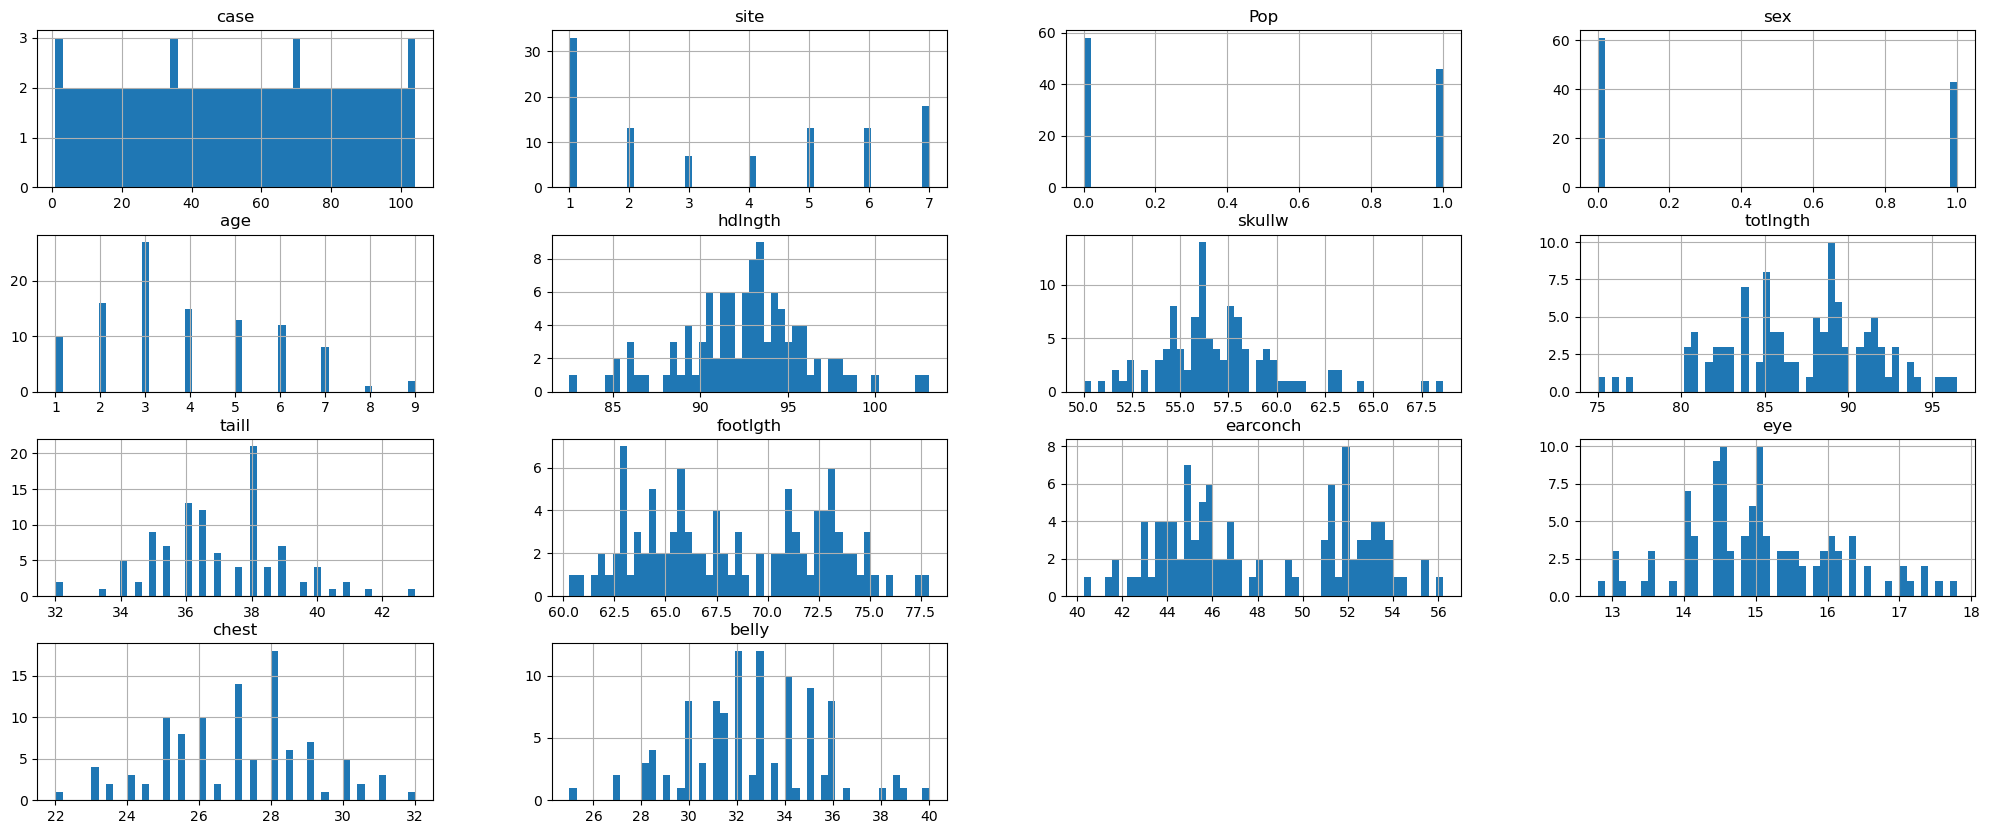

In [35]:
df.hist(figsize = (25,10), bins = 50)

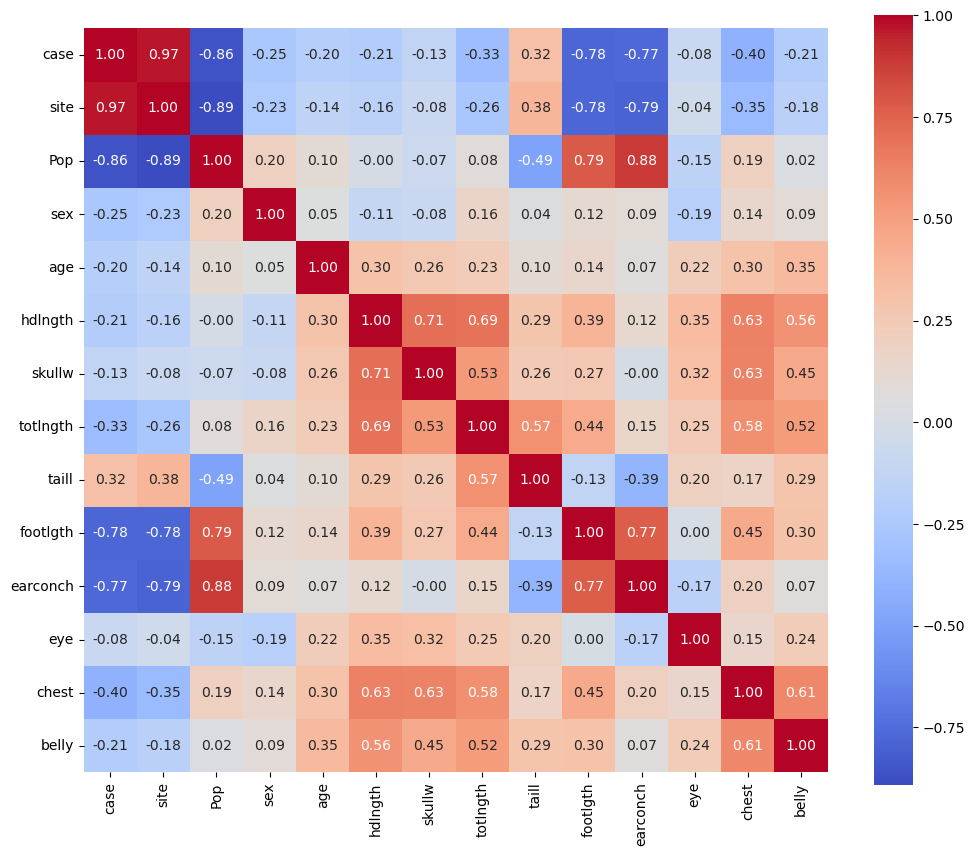

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,square = True, fmt=".2f", cmap="coolwarm")
plt.show()

Видно что имеется сильная зависимость между site и case 0.97, earconch и Pop 0.88. 

---

# Обучение моделей

In [40]:
correlation_matrix = df.corr()

target_corr = correlation_matrix['age'].sort_values(ascending=False)
print(target_corr)

age         1.000000
belly       0.353559
hdlngth     0.300544
chest       0.299733
skullw      0.261986
totlngth    0.233977
eye         0.221171
footlgth    0.138503
Pop         0.103487
taill       0.098614
earconch    0.065145
sex         0.049034
site       -0.140751
case       -0.195525
Name: age, dtype: float64


In [41]:
columns_to_drop = ['earconch', 'sex','site','case']
df = df.drop(columns=columns_to_drop)

In [42]:
X = df.drop(columns=['age'])
y = df['age']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (69, 9)
Размер тестовой выборки: (35, 9)


Выбрали целевую пременную age

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model): # Кросс-валидацию модели
    pred = cross_val_score(model, X, y, cv=10) 
    return pred.mean()

# 
def print_evaluate(true, predicted):  # Печатает значения всех метрик
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae) # средняя абсолютная ошибка
    print('MSE:', mse) # среднеквадратичная ошибка
    print('RMSE:', rmse) # корень среднеквадратичной ошибки
    print('R2 Square', r2_square) # 
    print('__________________________________')

def evaluate(true, predicted): # Возвращает значения метрик для оценки качества модели
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


Прописываем код для оценки качества модели машинного обучения, основываясь на метриках ошибок и кросс-валидации

# LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.4000038897037224
MSE: 3.6438078513997936
RMSE: 1.9088760702046095
R2 Square 0.10115492993057862
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4013488987890617
MSE: 2.8440113764891595
RMSE: 1.686419691680917
R2 Square 0.16241877004423555
__________________________________


# Ridge Regression

In [50]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred), cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.4861533853002733
MSE: 3.5249409636082376
RMSE: 1.8774826133970555
R2 Square 0.13047670551347357
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4369978259004395
MSE: 3.09098892375897
RMSE: 1.758120850157625
R2 Square 0.08968215600541518
__________________________________


# LASSO Regression

In [52]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.4826016330679959
MSE: 3.417973854828215
RMSE: 1.8487763128156458
R2 Square 0.15686307447350734
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4464498115735365
MSE: 3.1210846425813408
RMSE: 1.7666591755574534
R2 Square 0.08081875644378544
__________________________________


# Ridge Regression

In [54]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.4858786937057624
MSE: 3.5268938388611413
RMSE: 1.8780026195032693
R2 Square 0.12999497531113624
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4267077475257486
MSE: 3.085939179491434
RMSE: 1.7566841433483238
R2 Square 0.09116934098981078
__________________________________


# RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.3871714285714287
MSE: 3.1507466
RMSE: 1.7750342531906251
R2 Square 0.22278200060410802
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5524782608695653
MSE: 0.4465583333333334
RMSE: 0.6682502026436905
R2 Square 0.8684854493999752
__________________________________


In [62]:
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
Linear Regression,1.400004,3.643808,1.908876,0.101155,-0.304340
Ridge Regression,1.486153,3.524941,1.877483,0.130477,-0.286465
Lasso Regression,1.482602,3.417974,1.848776,0.156863,-0.133806
Elastic Net Regression,1.485879,3.526894,1.878003,0.129995,-0.144938
Random Forest Regressor,1.387171,3.150747,1.775034,0.222782,0.000000


<Axes: ylabel='Model'>

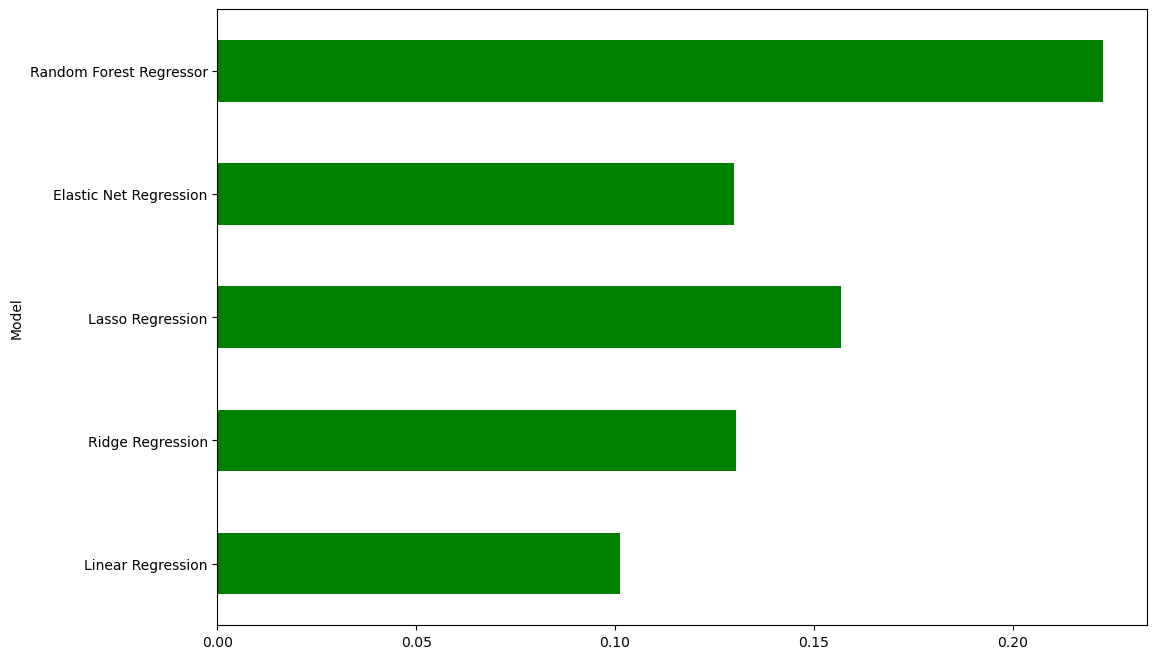

In [58]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color="g")

- Random Forest Regressor -  продемонстрировал лучшие результаты по всем метрикам, превосходя как линейные модели, так и модели с регуляризацией
- Elastic Net Regression - находится на уровне Ridge Regression, но уступает Lasso Regression.
- Lasso Regression - показывает наилучшие результаты среди моделей регуляризации.
- Ridge Regression - показывает небольшое улучшение по сравнению с Linear Regression
- Linear Regression - показывает низкое качество предсказаний. Модель плохо подходит для этих данных.

# Общий вывод:

- Лучшая модель: Random Forest Regressor — минимальные ошибки и лучший коэффициент детерминации.
- Linear Regression: Самая слабая модель с высоким значением ошибок и низким качеством предсказаний.